# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('dataset/real_estate_data.csv', sep='[,\t]', decimal='.', engine='python', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data = data.loc[:, 'total_images':'days_exposition']

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

### Вывод

1. Предложенные данные разделены не только классической запятой, а знаком '\t' (табуляция). После введения двух разделителей пришел в порядок столбец 'total_images', а после правильного указания десятичного знака большее количество данных получило верный тип. Все это перечеркнуло предыдущие манипуляции и я принял решение во время работы над предыдущей версией, что начну все заново.
2. Изменения типов требуют столбцы ['last_price', 'total_area', 'floors_total', 'balcony', 'airports_nearest', 'parks_around3000', 'ponds_around3000', 'days_exposition'] - значения в которых должны представлять из себя целочисленные значения.
3. Столбец 'first_day_exposition' требует преобразования в формат даты.
4. Столбец 'is_apartment' необходимо преобразовать в булев тип.

### Шаг 2. Предобработка данных

##### Приведем столбцы к нужному формату


Для наглядности приведем столбец 'last_price' в млн. рублей:

In [7]:
data['last_price'] = (data['last_price']/1000000).round(3)

+ Преобразуем столбец с датой в верный формат:

In [8]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

+ Заменим количество неопределенное количество балконов на 0:

In [9]:
data['balcony'] = data['balcony'].fillna(0)

*Здесь предположительно отсутствие балконов было представлено как пустое значение. Поэтому заменили его на нулевое.*

+ Заменим пустые значения в столбце 'is_apartment' на 'False', потому что рынок апартаметов еще очень мало представлен в России.
Общая тендеция подразумевает, что квартир со свободной планировкой или квартир-студий не много, что позволяет предположить, что и апартаментов не так много, и поставить вместо пропущенных значений **False**.

Изучим столбец **'floors_total'** и попытаемся заполнить пропуски. Предположительно пропуски возникли там, где в столбце floor уже указан последний этаж.

In [10]:
data['floors_total'].isna().sum()

86

In [11]:
data[data['floors_total'].isna()].loc[:, ['floor', 'floors_total']].head()

,floor,floors_total
186,4,NaN
237,1,NaN
457,12,NaN
671,8,NaN
1757,9,NaN


Закономерности не получается обнаружить.

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

+ Преобразуем тип стоблца в boolean:

In [13]:
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].dtypes

dtype('bool')

Большое количество столбцов было решено оставить с пропущенными значениями, так как достоверно предположить пропущенные значения не представляется возможным. Кроме того, в столбцах 
        
        ceiling_height, 
        floors_total,
        living_area, 
        kitchen_area, 
        locality_name 

\- значения пропущены по ошибке выгрузки данных или системы регистрации.

А в столбцах 
        
        airports_nearest, 
        cityCenters_nearest
        
\- вероятно данные "достопримечательности" просто отсутствуют по близости, но позволяет нам заменить пропущенные значения на нулевые.

In [14]:
null_candidate = ['airports_nearest', 
    'cityCenters_nearest']

for candidate in null_candidate:
    data[candidate] = data[candidate].fillna(0)

- Разберем отношения parks_around3000 и parks_nearest так же как и ponds_around3000 и ponds_nearest.

In [15]:
data.query('parks_nearest > 3000 and parks_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [16]:
data.query('parks_nearest < 3000 and parks_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [17]:
data.query('ponds_nearest > 3000 and ponds_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [18]:
data.query('ponds_nearest < 3000 and ponds_around3000 == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


- Пропущенных значений при заданных условиях не оказалось.

In [19]:
data.query('parks_nearest == "NaN"').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3.350,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2.890,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,0.0,0.0,NaN,NaN,NaN,NaN,55.0
6,6,3.700,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7.915,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2.900,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,0.0,0.0,NaN,NaN,NaN,NaN,189.0


In [20]:
data.query('ponds_nearest == "NaN"').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3.350,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2.890,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,0.0,0.0,NaN,NaN,NaN,NaN,55.0
6,6,3.700,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7.915,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2.900,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,0.0,0.0,NaN,NaN,NaN,NaN,189.0


Встречаются значения где parks_around3000 и ponds_around3000 равны нулю, а это дает нам право указать, что parks_nearest и ponds_nearest тоже равны нулю, ибо если внутри 3 км ничего нет, то и расстояние до ближайшего либо слишком большое, что его даже не нужно указывать, либо его совсем нет.

In [21]:
data.query('parks_around3000 == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3.700,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7.915,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5.400,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3.300,44.0,2018-08-27,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21.400,145.0,2018-11-02,4,3.00,26.0,71.4,17,False,...,15.6,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2.490,31.0,2019-01-24,1,2.50,5.0,17.3,5,False,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3.200,39.0,2017-12-16,1,NaN,9.0,20.0,6,False,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9.200,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,15.0,0.0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


In [22]:
data['ponds_nearest'] = data[data['ponds_around3000'] == 0]['ponds_nearest'].fillna(0)

In [23]:
data.query('ponds_around3000 == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3.350,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,0.0,81.0
6,6,3.700,37.3,2017-11-02,1,NaN,26.0,10.6,6,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,0.0,155.0
7,5,7.915,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,0.0,NaN
9,18,5.400,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,0.0,289.0
11,9,3.300,44.0,2018-08-27,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21.400,145.0,2018-11-02,4,3.00,26.0,71.4,17,False,...,15.6,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,0.0,NaN
23685,15,2.490,31.0,2019-01-24,1,2.50,5.0,17.3,5,False,...,5.6,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,0.0,NaN
23687,6,3.200,39.0,2017-12-16,1,NaN,9.0,20.0,6,False,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,0.0,38.0
23688,19,9.200,101.0,2019-04-01,3,3.05,15.0,63.0,12,False,...,15.0,0.0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,0.0,23.0


Так как в результате нашей проверки внутри радиусов ничего дополнительного не оказалось, то в столбцах **['parks_nearest']** и **['ponds_nearest']** заполняем пропуски нулевым значением, имея ввиду, что ближайших парков нет совсем (иначе если бы дом находился прямо внутри парка, было бы глупо это указывать).
Поскольку вероятно дальше 3км в неткоторых записях просто ничего нет, то по аналогии с балконами укажем в **['parks_around3000']** и **['ponds_aroud3000']** нулевые значения:

In [24]:
null_candidate = ['parks_nearest','parks_around3000', 
                  'ponds_nearest', 'ponds_around3000']

for candidate in null_candidate:
    data[candidate] = data[candidate].fillna(0)

In [25]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

##### Разберемся со столбцом **['days_exposition']**.

In [26]:
data.query('days_exposition == "NaN"').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,0.0,NaN
7,5,7.915,71.6,2019-04-18,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,0.0,0.0,0.0,NaN
44,13,5.350,40.0,2018-11-18,1,NaN,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,0.0,NaN
45,17,5.200,50.6,2018-12-02,2,2.65,9.0,30.3,7,False,...,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,0.0,0.0,0.0,NaN
46,17,6.600,52.1,2019-01-31,2,2.60,24.0,29.7,9,False,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,0.0,0.0,0.0,NaN


Преобразовал дату в секунды (иначе .plot выдает ошибку). 
- На графике рассеяния видно, что старые объявления были выставлены от 600 дней и выше.
- Новые же объявления держатся в таблице не очень долго. Наблюдается обратная зависимость.

###### После дополнительных манипуляций проведем попытку преобразования в целочисленные показатели (на радость перфекционисту):

In [27]:
intslist = ['total_area', 'floors_total', 'balcony', 'airports_nearest', 
            'parks_around3000', 'ponds_around3000', 'days_exposition']
welldone = []
badmade = []
for column_ft in intslist:
    try:
        data[column_ft] = data[column_ft].astype('int')
        welldone.append(column_ft)
    except:
        badmade.append(column_ft)
print('Удачно преобразованные столбцы:\n', welldone)
print()
print('Не удалось преобразовать:\n', badmade)

Удачно преобразованные столбцы:
 ['total_area', 'balcony', 'airports_nearest', 'parks_around3000', 'ponds_around3000']

Не удалось преобразовать:
 ['floors_total', 'days_exposition']


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  int64         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Остались столбцы, пустые значения которых восстановить не представляется возможным. Оставим пустые значения не тронутыми.

### Шаг 3. Посчитайте и добавьте в таблицу

1. Добавим цену квадратного метра **['square_price']**:

- c округлением до копеек

In [29]:
data['square_price'] = (data['last_price'] / data ['total_area']).round(2)
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price
0,20,13.00,108,2019-03-07,3,2.7,16.0,51.0,8,False,...,0,Санкт-Петербург,18863,16028.0,1,482.0,2,0.0,NaN,0.12
1,7,3.35,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,посёлок Шушары,12817,18603.0,0,0.0,0,0.0,81.0,0.08


2. Добавим в таблицу день недели **['weekday']**, месяц **['month']** и год публикации **['year']** объявления:

In [30]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year
0,20,13.00,108,2019-03-07,3,2.7,16.0,51.0,8,False,...,16028.0,1,482.0,2,0.0,NaN,0.12,3,3,2019
1,7,3.35,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0,0.0,0,0.0,81.0,0.08,1,12,2018


3. Добавим в таблицу группировку по этажу **['floor_group']**: первый ***'first'***, последний ***'last'***, другой ***'other'***:

In [31]:
def floorgrp(row):
    numb = row['floor']
    last = row['floors_total']
    if numb == 1:
        return 'first'
    elif numb == last:
        return 'last'
    else:
        return 'other'

In [32]:
data['floor_group'] = data.apply(floorgrp, axis=1)

In [33]:
data.loc[:, ['floor','floors_total','floor_group']].query('floors_total == "NaN"').head()

,floor,floors_total,floor_group
186,4,NaN,other
237,1,NaN,first
457,12,NaN,other
671,8,NaN,other
1757,9,NaN,other


In [34]:
data['floors_total'][457]

nan

*Не удается создать отдельную категорию, в которой не известен последний этаж. Функция floorgrp не понимает сравнения last с 'NaN', 'nan' или None.*
Пришлось смириться с тем что пропущенные значения так же входят в группу other. Благо их 86 всего.

In [35]:
data.loc[:, ['floor','floors_total','floor_group']].head()

,floor,floors_total,floor_group
0,8,16.0,other
1,1,11.0,first
2,4,5.0,other
3,9,14.0,other
4,13,14.0,other


In [36]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,floor_group
0,20,13.000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,1,482.0,2,0.0,NaN,0.12,3,3,2019,other
1,7,3.350,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,0.0,0,0.0,81.0,0.08,1,12,2018,first
2,10,5.196,56,2015-08-20,2,NaN,5.0,34.3,4,False,...,1,90.0,2,0.0,558.0,0.09,3,8,2015,other
3,0,64.900,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,2,84.0,3,0.0,424.0,0.41,4,7,2015,other
4,2,10.000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,2,112.0,1,0.0,121.0,0.10,1,6,2018,other


4. Добавим соотношение жилой и общей площади **['livin_total_rel']**, а также отношение площади кухни к общей **['kitchen_total_rel']**:

In [37]:
data['livin_total_rel'] = (data['living_area'] / data['total_area']).round(2)
data['kitchen_total_rel'] = (data['kitchen_area'] / data['total_area']).round(2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,floor_group,livin_total_rel,kitchen_total_rel
0,20,13.000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,2,0.0,NaN,0.12,3,3,2019,other,0.47,0.23
1,7,3.350,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0,0.0,81.0,0.08,1,12,2018,first,0.46,0.28
2,10,5.196,56,2015-08-20,2,NaN,5.0,34.3,4,False,...,2,0.0,558.0,0.09,3,8,2015,other,0.61,0.15
3,0,64.900,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,3,0.0,424.0,0.41,4,7,2015,other,NaN,NaN
4,2,10.000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,1,0.0,121.0,0.10,1,6,2018,other,0.32,0.41


- Рассчитали соотношения с округлением до двух знаков после запятой для наглядности.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

##### Площадь квартиры в м<sup>2</sup>

In [38]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

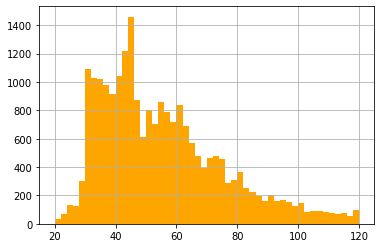

In [39]:
data['total_area'].hist(bins=50,color='orange',range=(20, 120))

##### Цена на момент снятия публикации (млн. руб.)

In [40]:
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012000
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [41]:
data.query('last_price < 0.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,floor_group,livin_total_rel,kitchen_total_rel
5698,7,0.450,42,2017-07-31,2,NaN,1.0,23.0,1,False,...,0,0.0,233.0,0.01,0,7,2017,first,0.55,0.14
6859,6,0.490,40,2017-12-11,1,NaN,5.0,NaN,3,False,...,0,0.0,43.0,0.01,0,12,2017,other,NaN,NaN
8793,7,0.012,109,2019-03-20,2,2.75,25.0,32.0,25,False,...,0,0.0,8.0,0.00,2,3,2019,last,0.29,0.37
9581,7,0.450,43,2018-08-31,2,NaN,5.0,30.3,3,False,...,0,0.0,96.0,0.01,4,8,2018,other,0.70,0.13
10782,3,0.490,29,2016-05-05,1,2.50,5.0,17.0,5,False,...,0,0.0,719.0,0.02,3,5,2016,last,0.59,0.19
14911,5,0.430,54,2018-06-26,2,NaN,3.0,NaN,3,False,...,0,0.0,44.0,0.01,1,6,2018,last,NaN,NaN
16032,8,0.480,32,2019-01-06,1,NaN,2.0,16.0,1,False,...,0,0.0,83.0,0.02,6,1,2019,first,0.50,NaN
16219,14,0.450,38,2018-07-11,2,2.65,2.0,NaN,1,False,...,0,0.0,45.0,0.01,2,7,2018,first,NaN,NaN
16274,18,0.440,40,2018-07-10,1,NaN,5.0,NaN,1,False,...,0,0.0,45.0,0.01,1,7,2018,first,NaN,NaN
17456,7,0.430,30,2019-04-22,1,NaN,2.0,16.0,1,False,...,0,0.0,NaN,0.01,0,4,2019,first,0.53,0.20


Подозрительная квартира за 12000 руб с площадью 109 кв.м.

In [42]:
data.query('last_price > 200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,floor_group,livin_total_rel,kitchen_total_rel
1436,19,330.000,190,2018-04-04,3,3.50,7.0,95.0,5,False,...,3,0.0,233.0,1.74,2,4,2018,other,0.50,0.21
5893,3,230.000,500,2017-05-31,6,NaN,7.0,NaN,7,False,...,2,0.0,50.0,0.46,2,5,2017,last,NaN,0.08
12971,19,763.000,400,2017-09-30,7,NaN,10.0,250.0,10,False,...,3,0.0,33.0,1.91,5,9,2017,last,0.62,NaN
13749,7,240.000,410,2017-04-01,6,3.40,7.0,218.0,7,False,...,2,0.0,199.0,0.59,5,4,2017,last,0.53,0.10
14706,15,401.300,401,2016-02-20,5,NaN,9.0,204.0,9,False,...,1,0.0,393.0,1.00,5,2,2016,last,0.51,0.06
15651,20,300.000,618,2017-12-18,7,3.40,7.0,258.0,5,False,...,2,0.0,111.0,0.49,0,12,2017,other,0.42,0.11
16461,17,245.000,285,2017-04-10,6,3.35,7.0,182.8,4,False,...,3,0.0,249.0,0.86,0,4,2017,other,0.64,0.10
19540,8,420.000,900,2017-12-06,12,2.80,25.0,409.7,25,False,...,2,0.0,106.0,0.47,2,12,2017,last,0.46,0.12
22831,18,289.238,187,2019-03-19,2,3.37,6.0,63.7,6,False,...,3,0.0,NaN,1.55,1,3,2019,last,0.34,0.16


Запредельно дорогие квартиры совсем уж не типичны (среди них и пентхаусы).

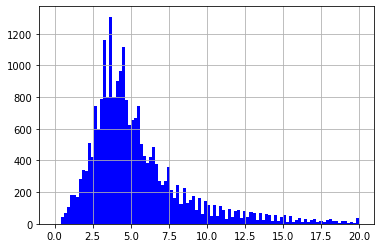

In [43]:
data['last_price'].hist(bins=100, color='blue', range=(0,20))

##### Число комнат

In [44]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Здесь так же пристутствуют выбросы, поскольку в квартире или доме не бывает ни одной комнаты и очень подоздрительное количество в 19 комнат.

In [45]:
data.query('rooms > 9')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,floor_group,livin_total_rel,kitchen_total_rel
648,3,17.500,183,2018-07-01,11,3.40,7.0,138.8,7,False,...,0,0.0,NaN,0.10,6,7,2018,last,0.76,0.07
866,5,25.000,363,2017-12-23,14,3.16,5.0,222.0,4,False,...,2,0.0,418.0,0.07,5,12,2017,other,0.61,0.05
4149,6,23.000,272,2018-01-11,10,3.14,7.0,145.9,7,False,...,1,0.0,NaN,0.08,3,1,2018,last,0.54,0.07
5358,20,65.000,590,2019-02-14,15,3.50,6.0,409.0,3,False,...,0,0.0,14.0,0.11,3,2,2019,other,0.69,0.17
9688,8,33.000,194,2017-02-07,11,3.43,5.0,129.0,2,False,...,2,0.0,813.0,0.17,1,2,2017,other,0.66,0.06
14498,6,32.250,374,2018-06-09,19,NaN,5.0,264.5,2,False,...,2,0.0,114.0,0.09,5,6,2018,other,0.71,0.07
18119,4,15.500,216,2016-07-04,10,3.15,5.0,161.4,2,False,...,0,0.0,11.0,0.07,0,7,2016,other,0.75,0.09
18848,6,28.500,270,2015-03-02,16,3.00,4.0,180.0,4,False,...,0,0.0,1365.0,0.11,0,3,2015,last,0.67,0.05
18891,11,40.000,290,2016-06-21,10,3.50,6.0,189.4,6,False,...,1,0.0,77.0,0.14,1,6,2016,last,0.65,0.10
19540,8,420.000,900,2017-12-06,12,2.80,25.0,409.7,25,False,...,2,0.0,106.0,0.47,2,12,2017,last,0.46,0.12


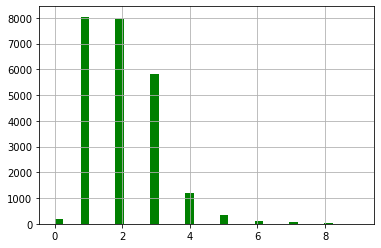

In [46]:
data['rooms'].hist(bins=35, color='green', range=(0,9))

##### Высота потолков (м)

In [47]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Очевидно здесь существуют выбросы как сверху так и снизу, поскольку потолки не бывают высотой в метр или в 100 метров.

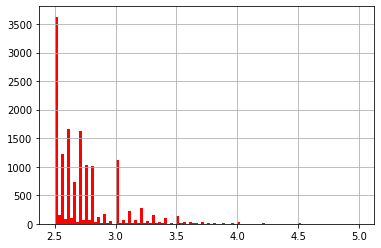

In [48]:
data['ceiling_height'].hist(bins=100, color='red', range=(2.5,5))

#### 2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [49]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

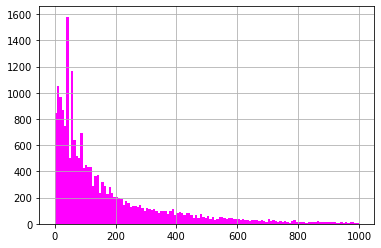

In [50]:
data['days_exposition'].hist(bins=130, color='magenta', range=(0,1000))

Исходя из медианного значения средняя скорость продажи квартиры составляет примерно 95 дней. Среднее значение подходит хуже, так как встречаются выбросы, нарушающие равномерность.
Полагаю что продажи за один день - это слишком быстро, а продажи порядка 1000 и более дней - это крайне долго.

#### 3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Возьмем наиболее часто встречающиеся значения изученных выше столбцов и соберем новый датафрейм:

In [51]:
clean_data = data.copy()

In [52]:
clean_data = clean_data[(clean_data['total_area'] >= 20) & (clean_data['total_area'] <= 120)]
clean_data.shape

(22620, 29)

In [53]:
clean_data = clean_data[clean_data['last_price'] <= 200]
clean_data.shape

(22620, 29)

In [54]:
clean_data = clean_data[clean_data['rooms'] <= 9]
clean_data.shape

(22620, 29)

In [55]:
clean_data = clean_data[(clean_data['ceiling_height'] >= 2.5) & (clean_data['ceiling_height'] <= 5)]
clean_data.shape

(13660, 29)

In [56]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,livin_total_rel,kitchen_total_rel
count,23699.000000,23699.000000,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,23699.000000,23699.000000,23699.0,20518.000000,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,9.858475,6.541549,60.120511,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,...,167.315499,0.590911,0.0,180.888634,0.099902,2.569307,6.400101,2017.367146,0.567345,0.188248
std,5.682529,10.887013,35.665822,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,...,306.709997,0.883999,0.0,219.727988,0.050503,1.789082,3.491561,1.039771,0.105729,0.073609
min,0.000000,0.012000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,2014.000000,0.020000,0.030000
25%,6.000000,3.400000,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.0,45.000000,0.080000,1.000000,3.000000,2017.000000,0.500000,0.130000
50%,9.000000,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,0.000000,0.0,95.000000,0.100000,3.000000,6.000000,2017.000000,0.570000,0.170000
75%,14.000000,6.800000,69.000000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,...,301.000000,1.000000,0.0,232.000000,0.110000,4.000000,10.000000,2018.000000,0.640000,0.230000
max,50.000000,763.000000,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,0.0,1580.000000,1.910000,6.000000,12.000000,2019.000000,1.010000,0.790000


In [57]:
clean_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,weekday,month,year,livin_total_rel,kitchen_total_rel
count,13660.000000,13660.000000,13660.000000,13660.000000,13660.000000,13651.000000,12935.000000,13660.000000,12799.000000,13660.000000,...,13660.000000,13660.000000,13660.0,11427.000000,13660.000000,13660.000000,13660.000000,13660.000000,12935.000000,12799.000000
mean,10.267496,5.599951,55.702855,2.018375,2.704128,10.298147,32.279079,5.653148,9.952500,0.682577,...,168.206076,0.586091,0.0,184.795572,0.098840,2.507540,6.314568,2017.527233,0.571362,0.186761
std,5.551248,3.554135,20.383477,0.916708,0.243575,6.237148,14.118421,4.646180,4.661772,1.005791,...,298.401172,0.878677,0.0,222.989494,0.038626,1.793461,3.499838,1.015109,0.102062,0.071758
min,0.000000,0.012000,20.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,2014.000000,0.040000,0.050000
25%,6.000000,3.500000,40.000000,1.000000,2.500000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.0,44.500000,0.080000,1.000000,3.000000,2017.000000,0.500000,0.130000
50%,10.000000,4.700000,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,0.0,99.000000,0.100000,2.000000,6.000000,2018.000000,0.580000,0.170000
75%,14.000000,6.590000,67.000000,3.000000,2.790000,14.000000,42.000000,8.000000,11.300000,1.000000,...,313.000000,1.000000,0.0,238.000000,0.120000,4.000000,10.000000,2018.000000,0.640000,0.230000
max,50.000000,53.000000,120.000000,6.000000,5.000000,60.000000,101.000000,30.000000,64.000000,5.000000,...,3190.000000,3.000000,0.0,1580.000000,0.850000,6.000000,12.000000,2019.000000,0.990000,0.750000


#### 4. Какие факторы больше всего влияют на стоимость квартиры?

- Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра.

In [58]:
clean_data.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.701109,0.39743,-0.019786
total_area,0.701109,1.000000,0.78639,-0.064443
rooms,0.397430,0.786390,1.00000,-0.034990
cityCenters_nearest,-0.019786,-0.064443,-0.03499,1.000000


*Здесь наблюдается прямая взаимосвязь цены и площади. Связь очевидная - чем больше площадь квартиры тем больше ее цена.
Количество комнат слабее влияет на стоимость, но тем не менее так же увеличение количества комнат увеличивает цену.
Ну и очень очень слабо прослеживается обратная зависимость удаленности от центра - чем дальше от центра тем дешевле.*

- Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

In [59]:
clean_data.pivot_table(index='floor_group', values='last_price', aggfunc=['mean', 'median','count'])

,mean,median,count
,last_price,last_price,last_price
floor_group,,,
first,4.551314,4.00,1751
last,5.225499,4.39,1916
other,5.855491,4.90,9993


*Здесь наблюдается что дешевле обойдется квартира на первом этаже (если только это не отдельный дом). Немного дороже стоит последний этаж (опять же с оговоркой на пентхаусы, которые обладают большими площадами и стоят очень дорого). Квартиры между первым и последним этажами конечно же представлены в большинстве и обладают большим влиянием на повышение цены.*

- Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [60]:
clean_data.loc[:, ['last_price', 'weekday', 'month', 'year']].corr()

,last_price,weekday,month,year
last_price,1.000000,-0.022817,-0.003944,-0.017035
weekday,-0.022817,1.000000,-0.007394,-0.003430
month,-0.003944,-0.007394,1.000000,-0.301310
year,-0.017035,-0.003430,-0.301310,1.000000


*На матрице корреляции ярких зависимостей особо не обнаруживается.*

In [61]:
(clean_data.pivot_table(index='weekday', values='last_price', 
                        aggfunc=['median','count','sum']).sort_values(by=('sum','last_price'), ascending=False))

,median,count,sum
,last_price,last_price,last_price
weekday,,,
1,4.90,2500,14429.294
3,4.69,2454,13741.377
2,4.70,2252,12614.297
0,4.73,2224,12492.704
4,4.65,2187,12162.692
5,4.60,1119,6034.043
6,4.60,924,5020.918


*Сводная таблица показывает что больше всего продаж произошло во вторник. При этом менее удачные сделки проходили в выходные дни.*

In [62]:
(clean_data.pivot_table(index='month', values='last_price', 
                        aggfunc=['median','count','sum']).sort_values(by=('sum','last_price'), ascending=False))

,median,count,sum
,last_price,last_price,last_price
month,,,
2,4.800,1599,8991.221
3,4.600,1635,8896.691
4,4.900,1413,8167.509
11,4.700,1330,7415.482
10,4.650,1261,6994.681
9,4.700,1141,6463.110
8,4.725,1034,5837.971
7,4.750,994,5642.337


*Сводная таблица показывает более-менее умеренное распределение по месяцам, но тем не менее можно выделить что по сумме стоимостей квартир, прибыльнее оказался февраль. Менее прибыльным вышел май.*

*Однако больше всего сделок было совершено в марте. Минимум сделок как и минимум суммы пришелся на май.*

*По стоимости сделок выгоднее оказался апрель, а дешевле всего квартиры стоили в июне.*

In [63]:
(clean_data.pivot_table(index='year', values='last_price', 
                        aggfunc=['median','count', 'sum']).sort_values(by=('sum','last_price'), ascending=False))

,median,count,sum
,last_price,last_price,last_price
year,,,
2018,4.600,5540,30038.083
2017,4.570,4160,23094.000
2019,5.100,2093,12375.711
2016,4.700,1271,7164.508
2015,5.265,535,3335.430
2014,6.800,61,487.593


*По годам самый прибыльный по сумме и количеству сделок вышел 2018 год. Наименее удачным оказался 2015 год (самый не удачный по таблице 2014 не будем учитывать, так как присутствует совсем немного записей, относительно остальных лет).*

*По выгоности сделок хорошо показались себя 2014 и 2019 годы. Здесь удавалось продавать дорогую недвижимость. Наименее дорогие сделки пришлись на 2017 год.*

#### 5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [64]:
len(clean_data['locality_name'].str.lower().unique())

278

In [65]:
len(clean_data['locality_name'].unique())

278

- Дополнительных преобразований по регистру не требуется можно продолжить сортировку.

In [66]:
loc_table = (clean_data.pivot_table(index='locality_name', values='square_price',
                        aggfunc=['count','mean']).sort_values(by=('count', 'square_price'), ascending=False))

In [67]:
loc_table.head(10)

,count,mean
,square_price,square_price
locality_name,,
Санкт-Петербург,9361,0.112323
Всеволожск,268,0.067910
Пушкин,218,0.103165
посёлок Шушары,216,0.080000
Колпино,201,0.076169
посёлок Мурино,198,0.088333
Гатчина,147,0.070408
Петергоф,141,0.085816


 *Вот перечень населенных пунктов, в которых представлено наибольшее количество объявлений.*

In [68]:
max_price = clean_data['last_price'].max()
min_price = clean_data['last_price'].min()

In [69]:
clean_data.query('last_price >= @max_price').loc[:,['locality_name', 'last_price']]

,locality_name,last_price
10011,Санкт-Петербург,53.0


In [70]:
clean_data.query('last_price <= @min_price').loc[:,['locality_name', 'last_price']]

,locality_name,last_price
8793,Санкт-Петербург,0.012


*В Санкт-Петербурге, по всей видимости из-за величины предложения, можно встретить как самую дорогую стоимость жилья, так и самую низкую стоимость.*

#### 6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [71]:
clean_data['km_to_center'] = ((clean_data['cityCenters_nearest'] / 1000).round(0)).astype('int')
spb_data = clean_data.query('locality_name == "Санкт-Петербург"')
spb_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,square_price,weekday,month,year,floor_group,livin_total_rel,kitchen_total_rel,km_to_center
0,20,13.00,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,NaN,0.12,3,3,2019,other,0.47,0.23,16
4,2,10.00,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,121.0,0.10,1,6,2018,other,0.32,0.41,8
9,18,5.40,61,2017-02-26,3,2.50,9.0,43.6,7,False,...,0.0,289.0,0.09,6,2,2017,other,0.71,0.11,15
10,5,5.05,39,2017-11-16,1,2.67,12.0,20.3,3,False,...,0.0,137.0,0.13,3,11,2017,other,0.52,0.22,14
16,11,6.70,82,2017-11-23,3,3.05,5.0,55.6,1,False,...,0.0,397.0,0.08,3,11,2017,first,0.68,0.11,11


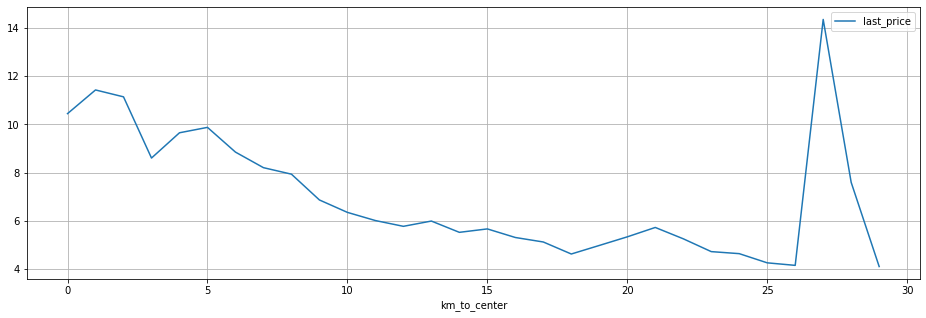

In [72]:
spb_data.pivot_table(index='km_to_center', values='last_price').plot(y='last_price', grid=True, figsize=(16,5))

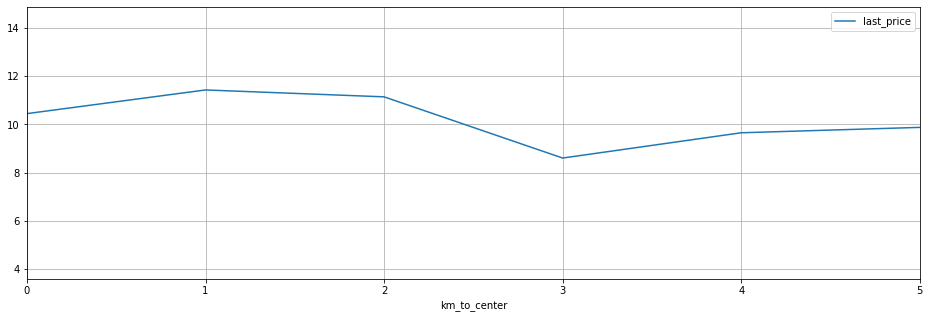

In [73]:
spb_data.pivot_table(index='km_to_center', values='last_price').plot(y='last_price', grid=True, figsize=(16,5), xlim=(0,5))

Точка перегиба теперь сметилась при детальном рассмотрении в сторону 3 км. Попробуем рассмотреть последущие рассчеты от этой величины.
Значение после 25 км - это либо выброс, либо реальные пристижные отдаленные таун-хаусы.

#### 7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

In [74]:
spb_center = spb_data.query('km_to_center <= 3')

In [75]:
param_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
colors_list = ['orange', 'turquoise', 'blue', 'red']

total_area
count    488.000000
mean      75.196721
std       22.577592
min       22.000000
25%       60.000000
50%       75.000000
75%       93.250000
max      120.000000
Name: total_area, dtype: float64

last_price
count    488.000000
mean      10.147309
std        5.883105
min        2.645000
25%        6.800000
50%        8.650000
75%       11.562500
max       53.000000
Name: last_price, dtype: float64

rooms
count    488.000000
mean       2.639344
std        0.970324
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: rooms, dtype: float64

ceiling_height
count    488.000000
mean       3.163238
std        0.366449
min        2.500000
25%        2.907500
50%        3.100000
75%        3.400000
max        4.800000
Name: ceiling_height, dtype: float64



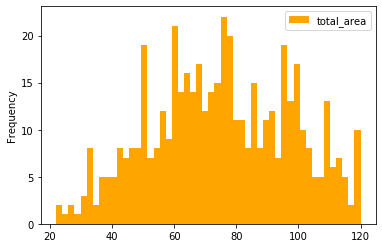

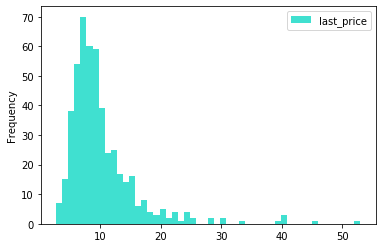

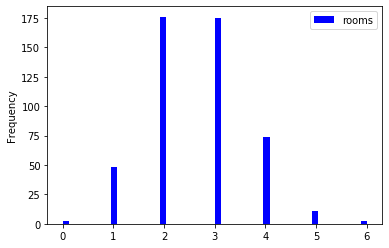

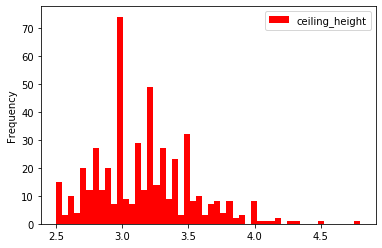

In [76]:
for i in range(4):
    print(param_list[i])
    print(spb_center[param_list[i]].describe())
    spb_center.plot(y=param_list[i], kind='hist', bins=50, color=colors_list[i])
    print()

*Чаще всего в центре города встречаются предложения с общей площадью 75 кв.м., средняя стоимость предложений 8,7 млн. руб., чаще встречаются предложения с 2-мя или 3-мя комнатами, и типичная для центра города высота потолков 3 метра (можно предположить, что большинство предложений в старых домах дореволюционной или сталинской эпох).*

#### Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [77]:
spb_center.loc[:, ['last_price', 'rooms', 'floor', 'cityCenters_nearest', 'days_exposition']].corr()

,last_price,rooms,floor,cityCenters_nearest,days_exposition
last_price,1.000000,0.116330,0.053407,-0.128837,0.070082
rooms,0.116330,1.000000,0.046082,0.026563,0.159149
floor,0.053407,0.046082,1.000000,-0.085662,0.008421
cityCenters_nearest,-0.128837,0.026563,-0.085662,1.000000,0.024639
days_exposition,0.070082,0.159149,0.008421,0.024639,1.000000


In [78]:
spb_data.loc[:, ['last_price', 'rooms', 'floor', 'cityCenters_nearest', 'days_exposition']].corr()

,last_price,rooms,floor,cityCenters_nearest,days_exposition
last_price,1.000000,0.416758,0.038102,-0.394762,0.145642
rooms,0.416758,1.000000,-0.170743,-0.192963,0.121148
floor,0.038102,-0.170743,1.000000,0.214105,-0.029969
cityCenters_nearest,-0.394762,-0.192963,0.214105,1.000000,-0.115998
days_exposition,0.145642,0.121148,-0.029969,-0.115998,1.000000


*Отметим что количество комнат (прямо) и удаленность от центра (в обратной зависимости) немного влияют на стоимость в центре города, остальные из предложенных факторов показывают очень маленькую зависимость.*
*При этом в целом по городу стомость падает по мере удаленности от центра (мотивация людей: лишь бы перебраться в центр и продавцы на это сильно реагируют). Так же количество комнат, пожалуй, значимо влияет на цену квартир.*

### Шаг 5. Общий вывод

###### - Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

*Исходя из медианного значения средняя скорость продажи квартиры составляет примерно 95 дней. Среднее значение подходит хуже, так как встречаются выбросы, нарушающие равномерность. Полагаю что продажи за один день - это слишком быстро, а продажи порядка 1000 и более дней - это крайне долго.*

###### - Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

*По краям всего датафрема можно выделить огромное количество выбросов, так как встречаются квартиры с нестандартно высокой ценой, с этажностью до 60 этажей или, например, площадью до 900 кв.м. Рекомендуется еще раз перепроверить перенос данных в таблицу и перенастроить более точно выгрузку.*

###### - Какие факторы больше всего влияют на стоимость квартиры?

*Отмечается прямая взаимосвязь цены и общей площади квартиры. Связь очевидная - чем больше площадь квартиры тем больше ее цена. Количество комнат слабее влияет на стоимость, но тем не менее так же, чем больше комнат, тем выше цена. Ну и очень очень слабо прослеживается обратная зависимость удаленности от центра - чем дальше от центра тем дешевле.
Эти факторы являются вполне неоспоримыми и логичными, по этому любые выбросы в продажах по этим столбцам скорее всего являются фактом обмана.*

*По этажности наблюдается, что дешевле обойдется квартира на первом этаже (если только это не отдельный дом). Немного дороже стоит последний этаж (опять же с оговоркой на пентхаусы, которые обладают большими площадами и стоят очень дорого). Эти факторы так же стоит учесть при организации системы борьбы с мошенничеством.*

*Из неочевидных факторов можно выделить такие: больше всего продаж произведено во вторник, при этом менее удачные сделки проходили в выходные дни. Также можно выделить что по сумме стоимости квартир прибыльнее оказался февраль. Менее прибыльным вышел май. 
Однако больше всего сделок было совершено в марте. Минимум сделок как и минимум суммы пришелся на май. По стоимости сделок выгоднее оказался апрель, а дешевле всего квартиры стоили в июне.
Итоги: хорошо торгуем во вторник, плохо в выходные. Февраль самый прибыльный. Много продаж делается в марте. Цена сделки самая высокая в апреле. В мае и июне упадок. Стоит обратить внимание на эти месяцы и либо усилить рекламу, повысить лояльность системой гибких скидок и прочего.*

*По годам самый прибыльный по сумме и количеству сделок вышел 2018 год. Наименее удачным оказался 2015 год (без учета 2014 года за не имением большого объема данных).По выгодности сделок хорошо показали себя 2014 и 2019 годы. Здесь удавалось продавать дорогую недвижимость. Наименее дорогие сделки пришлись на 2017 год.*

###### - Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Ваша задача — выяснить, какая область входит в центр.

*Центральной зоной можно считать квартире в радиусе 10 км до центра.*

###### - Выделите сегмент квартир в центре. Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

*Чаще всего в центре города встречаются предложения с общей площадью 75 кв.м., средняя стоимость предложений 8,7 млн. руб., чаще встречаются предложения с 2-мя или 3-мя комнатами, и типичная для центра города высота потолков 3 метра (можно предположить, что большинство предложений в старых домах дореволюционной или сталинской эпох).*

*Отметим что количество комнат (прямо) и удаленность от центра (в обратной зависимости) немного влияют на стоимость в центре города, остальные из предложенных факторов показывают очень маленькую зависимость. При этом в целом по городу стомость падает по мере удаленности от центра (мотивация людей: лишь бы перебраться в центр и продавцы на это сильно реагируют). Так же количество комнат, пожалуй, значимо влияет на цену квартир.*